# Propagación de la afinidad

Una de las debilidades del algoritmo k-means es que tenemos que definir el número de clusters que esperamos encontrar en los datos. Si no estamos seguros del valor a encontrar, opciones codo o silueta.

El algoritmo de la propagación de la afinidad que se basa en crear clusters con una técnica de paso de mensajes entre los puntos de datos del dataset. Esta técnica intenta encontrar de forma automática el número de clusters a partir de los puntos del dataset.

Toma una matriz de similaridades como entrada de datos (s), las inversas de las distancias euclídeas, de manera que puntos cerca en distancia tienen una similaridad alta. Y calcula la matriz de responsabilidad a partir de la matriz de similaridad y la de disponibilidad.

In [1]:
from IPython.display import Image

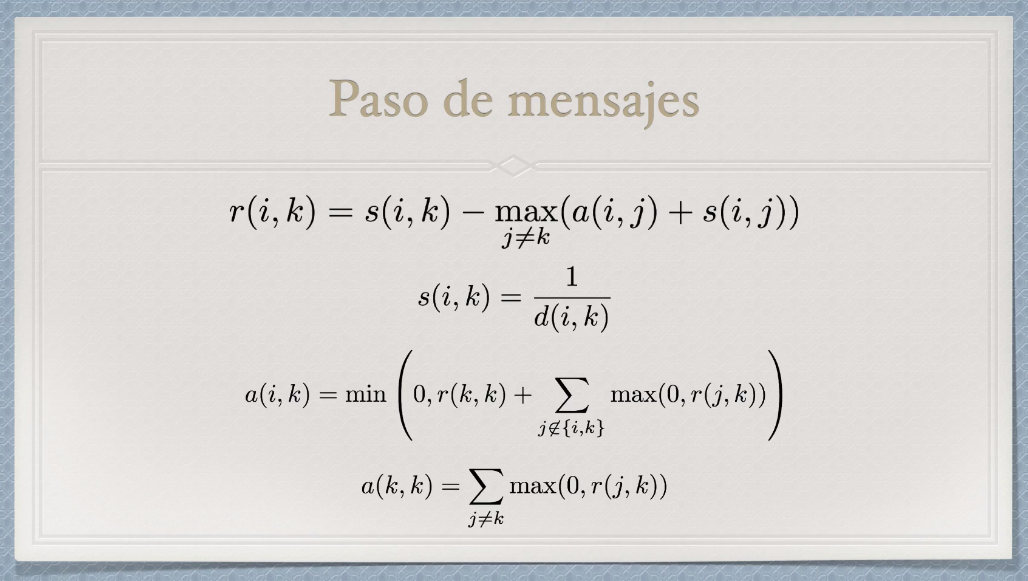

In [2]:
Image(filename="resources/afinidad.png")

Una desventaja de este método es la poca escalabilidad.

# Implementación en Python

In [3]:
# Generaremos unos datos aleatorios
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [4]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle

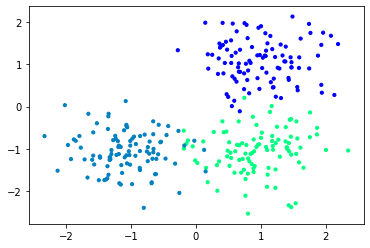

In [10]:
plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap="winter") # cmap, paletas de colores

In [11]:
af = AffinityPropagation(preference=-50).fit(X)

In [13]:
cluster_center_ids = af.cluster_centers_indices_

In [15]:
labels = af.labels_

In [16]:
n_clust = len(cluster_center_ids)
n_clust

3

In [17]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    clust_labels = af.labels_
    n_clust = len(cluster_center_ids)
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels,clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels,clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Información mutua ajustada: 1.000
Coeficiente de la silueta: 0.753


/Users/olivialuis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


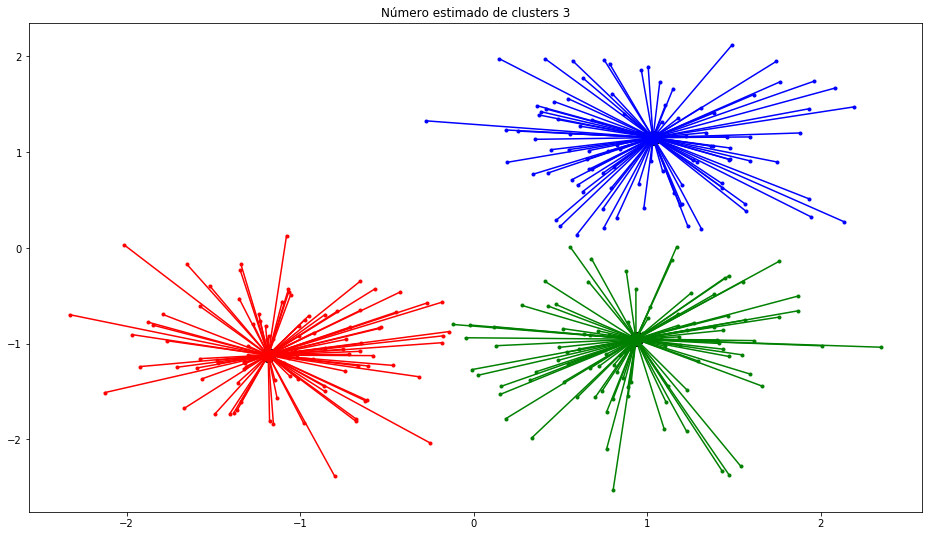

In [18]:
report_affinity_propagation(X)